# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV180"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP055569, SRP042161, SRP032775, SRP007508, SRP066834, SRP057196, SRP060416, SRP033135, SRP050499, SRP006575, SRP036821, SRP007947, SRP057205, SRP011185, SRP022892, SRP009862, SRP018838, SRP003726, SRP009266, SRP033116, SRP021916, SRP055153, SRP002184, SRP015668, SRP064464, SRP028301, SRP011546, SRP018020, SRP059775, SRP058773, SRP004847, SRP002487, SRP029452, SRP006474, SRP063840, SRP030617, SRP049097, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (35 != 37)
  warnings.warn(


In [18]:
lv_data.shape

(5644, 75)

In [19]:
lv_data.head()

cell type cell line patient id  \
project   run                                                                 
SRP055569 SRR1821717  MCF10a human breast cancer cells       NaN        NaN   
          SRR1821716  MCF10a human breast cancer cells       NaN        NaN   
          SRR1821715  MCF10a human breast cancer cells       NaN        NaN   
          SRR1821714  MCF10a human breast cancer cells       NaN        NaN   
          SRR1821713  MCF10a human breast cancer cells       NaN        NaN   

                     subtype infectious agent time point time-point tissue  \
project   run                                                                
SRP055569 SRR1821717     NaN              NaN        NaN        NaN    NaN   
          SRR1821716     NaN              NaN        NaN        NaN    NaN   
          SRR1821715     NaN              NaN        NaN        NaN    NaN   
          SRR1821714     NaN              NaN        NaN        NaN    NaN   
          SRR1821713     NaN              NaN        NaN        NaN    NaN   

                     subcellular Stage  ... clip variant enzymatic digestion  \
project   run                           ...                                    
SRP055569 SRR1821717         NaN   NaN  ...          NaN                 NaN   
          SRR1821716         NaN   NaN  ...          NaN                 NaN   
          SRR1821715         NaN   NaN  ...          NaN                 NaN   
          SRR1821714         NaN   NaN  ...          NaN                 NaN   
          SRR1821713         NaN   NaN  ...          NaN                 NaN   

                     protein cell source cdna synthesis method  \
project   run                                                    
SRP055569 SRR1821717     NaN         NaN                   NaN   
          SRR1821716     NaN         NaN                   NaN   
          SRR1821715     NaN         NaN                   NaN   
          SRR1821714     NaN         NaN                   NaN   
          SRR1821713     NaN         NaN                   NaN   

                     library construction method tissue type subtypes  \
project   run                                                           
SRP055569 SRR1821717                         NaN         NaN      NaN   
          SRR1821716                         NaN         NaN      NaN   
          SRR1821715                         NaN         NaN      NaN   
          SRR1821714                         NaN         NaN      NaN   
          SRR1821713                         NaN         NaN      NaN   

                     insert size     LV180  
project   run                               
SRP055569 SRR1821717         NaN -0.152781  
          SRR1821716         NaN -0.000186  
          SRR1821715         NaN -0.047115  
          SRR1821714         NaN  0.007089  
          SRR1821713         NaN  0.101873  

[5 rows x 75 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

cell type                 0.043762
subcellular               0.013612
culture medium            0.004575
ip antibody info          0.002704
ectopic barts             0.002704
ip antibody               0.002704
facs gating               0.002494
tonsil donor              0.002494
experiment_sample_name    0.001767
age                       0.001767
c1 chip id                0.001767
biological replicate      0.001697
treatment                 0.001697
source                    0.001576
tissue subtype            0.001576
patient id                0.001493
Stage                     0.001466
tissue                    0.001258
cell marker               0.001103
cancer or normal          0.001042
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type         0.043762
tissue subtype    0.001576
tissue            0.001258
tissue type       0.000208
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue subtype",
        "tissue",
        "tissue type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [26]:
_tmp_seq[1]

cell type  \
project   run                                                             
SRP066834 SRR2967374                                                NaN   
SRP057196 SRR1974652                                            neurons   
SRP055569 SRR2019176  mixture of U87 human glioma cells and WI-38 hu...   
SRP060416 SRR2088164                       tonsil Innate lymphoid cells   
          SRR2088196                       tonsil Innate lymphoid cells   
SRP057196 SRR1974906                                    fetal_quiescent   
SRP060416 SRR2088226                       tonsil Innate lymphoid cells   
SRP033135 SRR1033199             Human Skeletal Muscle Myoblasts (HSMM)   
SRP060416 SRR2088330                       tonsil Innate lymphoid cells   
SRP057196 SRR1974882                                  fetal_replicating   
SRP055569 SRR2019123  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019050                             U87 human glioma cells   
          SRR2019013                             U87 human glioma cells   
          SRR1821625                   MCF10a human breast cancer cells   
          SRR2019049                             U87 human glioma cells   
          SRR1821690                   MCF10a human breast cancer cells   
          SRR2019027                             U87 human glioma cells   
SRP066834 SRR2967110                                                NaN   
SRP055569 SRR1821360                             U87 human glioma cells   
          SRR2019022                             U87 human glioma cells   
SRP060416 SRR2088161                       tonsil Innate lymphoid cells   
SRP055569 SRR2019160  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019116  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821519  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019063                  WI-38 human lung fibroblast cells   

                     tissue subtype                               tissue  \
project   run                                                              
SRP066834 SRR2967374            NaN  Dissociated whole cerebral organoid   
SRP057196 SRR1974652            NaN                               cortex   
SRP055569 SRR2019176            NaN                                  NaN   
SRP060416 SRR2088164            NaN                                  NaN   
          SRR2088196            NaN                                  NaN   
SRP057196 SRR1974906            NaN                               cortex   
SRP060416 SRR2088226            NaN                                  NaN   
SRP033135 SRR1033199            NaN                                  NaN   
SRP060416 SRR2088330            NaN                                  NaN   
SRP057196 SRR1974882            NaN                               cortex   
SRP055569 SRR2019123            NaN                                  NaN   
          SRR2019050            NaN                                  NaN   
          SRR2019013            NaN                                  NaN   
          SRR1821625            NaN                                  NaN   
          SRR2019049            NaN                                  NaN   
          SRR1821690            NaN                                  NaN   
          SRR2019027            NaN                                  NaN   
SRP066834 SRR2967110            NaN  Dissociated whole cerebral organoid   
SRP055569 SRR1821360            NaN                                  NaN   
          SRR2019022            NaN                                  NaN   
SRP060416 SRR2088161            NaN                                  NaN   
SRP055569 SRR2019160            NaN                                  NaN   
          SRR2019116            NaN                                  NaN   
          SRR1821519            NaN                                  NaN   
          SRR2019063            NaN                         

In [27]:
# what is there in these projects?
lv_data.loc[["SRP032775"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

infectious agent      time point  \
project   run                                                      
SRP032775 SRR1026897  Plasmodium falciparum (Pf)             NaN   
          SRR1026874  Plasmodium falciparum (Pf)             NaN   
          SRR1177718  Plasmodium falciparum (Pf)  post-infection   
          SRR1026962                         n/a             NaN   
          SRR1177714  Plasmodium falciparum (Pf)  post-infection   
          SRR1177727                         n/a   pre-infection   
          SRR1177713                         n/a   pre-infection   
          SRR1177679                         n/a   pre-infection   
          SRR1026956                         n/a             NaN   
          SRR1026963  Plasmodium falciparum (Pf)             NaN   

                          time-point       tissue     LV180  
project   run                                                
SRP032775 SRR1026897  Post-infection          NaN  0.287939  
          SRR1026874  Post-infection          NaN  0.001503  
          SRR1177718             NaN  whole blood -0.001706  
          SRR1026962   Pre-infection          NaN -0.002050  
          SRR1177714             NaN  whole blood -0.002413  
          SRR1177727             NaN  whole blood -0.002431  
          SRR1177713             NaN  whole blood -0.002904  
          SRR1177679             NaN  whole blood -0.003442  
          SRR1026956   Pre-infection          NaN -0.003560  
          SRR1026963  Post-infection          NaN -0.003963

In [28]:
SELECTED_ATTRIBUTE = "cell type"

In [29]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [30]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [31]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [32]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [33]:
plot_data.head(20)

cell type  \
project   run                                                             
SRP055569 SRR2019184  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019182  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019199  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019202  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019203  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019002                             U87 human glioma cells   
          SRR1821422  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019230  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821354                             U87 human glioma cells   
          SRR1821607  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019000                             U87 human glioma cells   
          SRR2019187  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821684                   MCF10a human breast cancer cells   
SRP042161 SRR1294570                                       Glioblastoma   
SRP055569 SRR1821562  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019034                             U87 human glioma cells   
          SRR2019030                             U87 human glioma cells   
SRP032775 SRR1026897                                    NOT CATEGORIZED   
SRP055569 SRR2019093                  WI-38 human lung fibroblast cells   
          SRR2018992                             U87 human glioma cells   

                          LV180  
project   run                    
SRP055569 SRR2019184  11.796417  
          SRR2019182   0.964185  
          SRR2019199   0.776224  
          SRR2019202   0.720023  
          SRR2019203   0.681427  
          SRR2019002   0.511750  
          SRR1821422   0.505699  
          SRR2019230   0.454286  
          SRR1821354   0.433256  
          SRR1821607   0.388068  
          SRR2019000   0.347633  
          SRR2019187   0.340148  
          SRR1821684   0.320013  
SRP042161 SRR1294570   0.312778  
SRP055569 SRR1821562   0.310207  
          SRR2019034   0.305261  
          SRR2019030   0.302111  
SRP032775 SRR1026897   0.287939  
SRP055569 SRR2019093   0.283159  
          SRR2018992   0.278624

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [34]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [35]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [36]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [37]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [39]:
# _srp_code = "SRP045500"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"{lv_data.loc[(_srp_code, x.name), 'celltype']}"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'diseasestatus']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [40]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [41]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [42]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [43]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [44]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [45]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [54]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [55]:
len(attr_order)

15

In [56]:
attr_order[:5]

['Glioma + WI-38 lung fibroblast cells',
 'U87 human glioma cells',
 'Glioma + MCF10 breast cancer cells',
 'MCF10a human breast cancer cells',
 'Glioblastoma']

## Plot

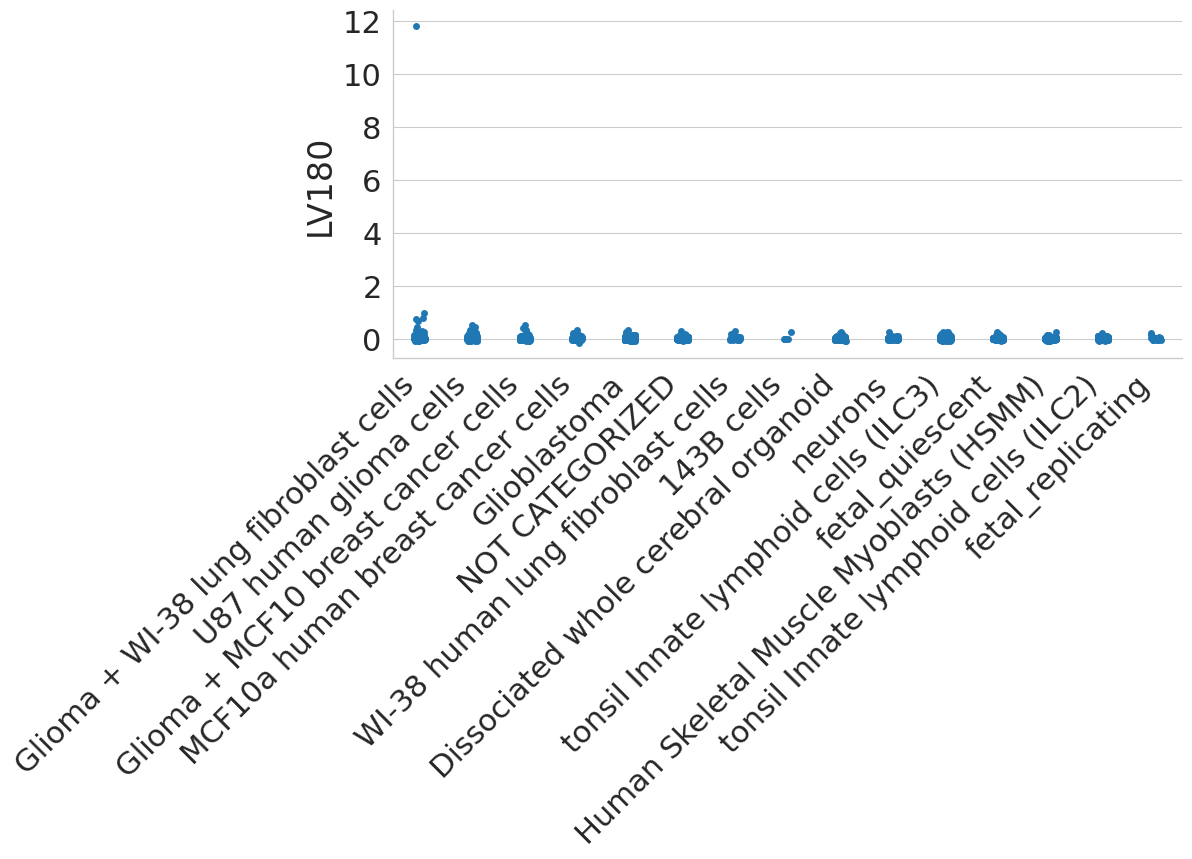

In [57]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [135]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [140]:
# with pd.option_context(
#     "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
# ):
#     _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("(NK)")].sort_values(LV_NAME, ascending=False)
#     display(_tmp.head(20))

In [141]:
# # what is there in these projects?
# _tmp = lv_data.loc[["SRP060416"]].dropna(how="all", axis=1).sort_values(
#     LV_NAME, ascending=False
# )

# display(_tmp.head(60))

In [143]:
# _tmp["facs gating"].value_counts()

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )